####  Bank Statement Analysis

In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Loading and Preprocessing

In [5]:
# Load the dataset
file_path = 'Data/bankstatements.csv'
bank_data = pd.read_csv(file_path)

In [6]:
# Display initial information
print(bank_data.info())
bank_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB
None


,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,NaN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,NaN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


In [7]:
bank_data.info

<bound method DataFrame.info of            date DrCr   amount    balance    mode       name  Day  Month  Year  \
0    2022-01-01   Db  10000.0  473292.87     ATM        NaN    1      1  2022   
1    2022-01-01   Db  10000.0  463292.87     ATM        NaN    1      1  2022   
2    2022-01-02   Db    930.0  462362.87     UPI   AYUBRAJE    2      1  2022   
3    2022-01-07   Db   2000.0  460362.87     UPI   ABUTALAH    7      1  2022   
4    2022-01-10   Db   1000.0  459362.87     UPI   AGRAWALB   10      1  2022   
..          ...  ...      ...        ...     ...        ...  ...    ...   ...   
504  2023-10-06   Cr  41050.0   97647.67  CHEQUE        NaN    6     10  2023   
505  2023-10-06   Cr    107.8   97755.47     ECS        NaN    6     10  2023   
506  2023-10-06   Cr  23586.0  121341.47     UPI  DADAKHALA    6     10  2023   
507  2023-10-06   Db  26286.0   95055.47     UPI   HDFCBANK    6     10  2023   
508  2023-10-07   Db    100.0   94955.47     UPI  LAGADEKSA    7     10  2023

In [8]:
bank_data.describe()

,amount,balance,Day,Month,Year,Tday
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,8736.453006,115873.671493,13.569745,6.163065,2022.489194,161.850688
std,27181.105774,136850.421744,9.168241,3.282459,0.500375,92.683683
min,1.000000,0.130000,1.000000,1.000000,2022.000000,1.000000
25%,400.000000,35345.130000,5.000000,3.000000,2022.000000,83.000000
50%,1120.000000,56645.670000,12.000000,6.000000,2022.000000,165.000000
75%,7000.000000,121341.470000,22.000000,9.000000,2023.000000,243.000000
max,360000.000000,473292.870000,31.000000,12.000000,2023.000000,313.000000


### 2. Data Cleaning

In [9]:
# Convert date column to datetime
bank_data['date'] = pd.to_datetime(bank_data['date'])

In [10]:
# Handle missing values
bank_data['name'] = bank_data['name'].fillna('Unknown')

In [11]:
# Remove duplicates
bank_data = bank_data.drop_duplicates()


In [12]:
bank_data.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,Unknown,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,Unknown,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


### 3. Outlier Detection and Removal

In [13]:
# Identify outliers using IQR method
Q1 = bank_data['amount'].quantile(0.25)
Q3 = bank_data['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Clean data by removing outliers
cleaned_data = bank_data[
    (bank_data['amount'] >= lower_bound) & 
    (bank_data['amount'] <= upper_bound)
]

### 4. Transaction Pattern Analysis

In [15]:
# Identify recurring transactions
recurring_transactions = (
    cleaned_data[cleaned_data['DrCr'] == 'Db']
    .groupby(['name', 'amount'])
    .size()
    .reset_index(name='frequency')
    .sort_values('frequency', ascending=False)
)

print("Top Recurring Transactions:")
print(recurring_transactions.head())

Top Recurring Transactions:
         name   amount  frequency
9    ABUTALAH   1000.0         27
205   Unknown  10000.0         20
7    ABUTALAH    500.0         13
204   Unknown   9000.0         12
13   ABUTALAH   2000.0          9


### 5. Financial Health Assessment


In [16]:
# Separate credits and debits
credits = cleaned_data[cleaned_data['DrCr'] == 'Cr']
debits = cleaned_data[cleaned_data['DrCr'] == 'Db']

In [17]:
# Calculate financial metrics
total_income = credits['amount'].sum()
total_expenses = debits['amount'].sum()
savings_rate = (total_income - total_expenses) / total_income * 100

print("\nFinancial Metrics:")
print(f"Total Income: ${total_income:,.2f}")
print(f"Total Expenses: ${total_expenses:,.2f}")
print(f"Savings Rate: {savings_rate:.2f}%")


Financial Metrics:
Total Income: $357,486.59
Total Expenses: $786,676.99
Savings Rate: -120.06%


### 6. Data Visualization

In [18]:
# Expense Distribution
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Expense Distribution by Mode')

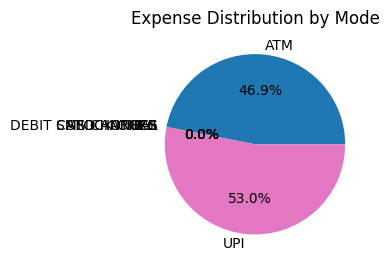

In [19]:
# Pie chart of expense categories
expense_categories = cleaned_data[cleaned_data['DrCr'] == 'Db'].groupby('mode')['amount'].sum()
plt.subplot(1, 2, 1)
plt.pie(expense_categories, labels=expense_categories.index, autopct='%1.1f%%')
plt.title('Expense Distribution by Mode')

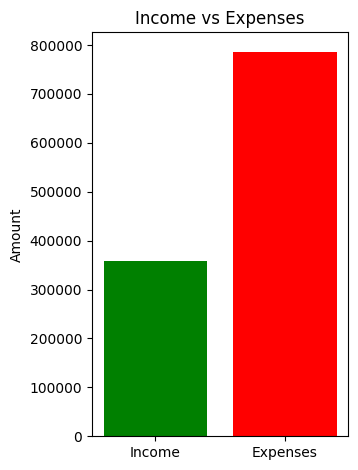

In [20]:
# Bar chart of income vs expenses
plt.subplot(1, 2, 2)
plt.bar(['Income', 'Expenses'], [total_income, total_expenses], color=['green', 'red'])
plt.title('Income vs Expenses')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

### 7. Monthly Transaction Trends

In [21]:
# Aggregate monthly transactions
monthly_data = cleaned_data.groupby([
    pd.Grouper(key='date', freq='M'), 
    'DrCr'
])['amount'].sum().reset_index()

/var/folders/y3/qn3byhnn1s99k1n97gncyb4h0000gn/T/ipykernel_15181/4139716737.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='date', freq='M'),


In [22]:
# Separate credits and debits
monthly_credits = monthly_data[monthly_data['DrCr'] == 'Cr']
monthly_debits = monthly_data[monthly_data['DrCr'] == 'Db']

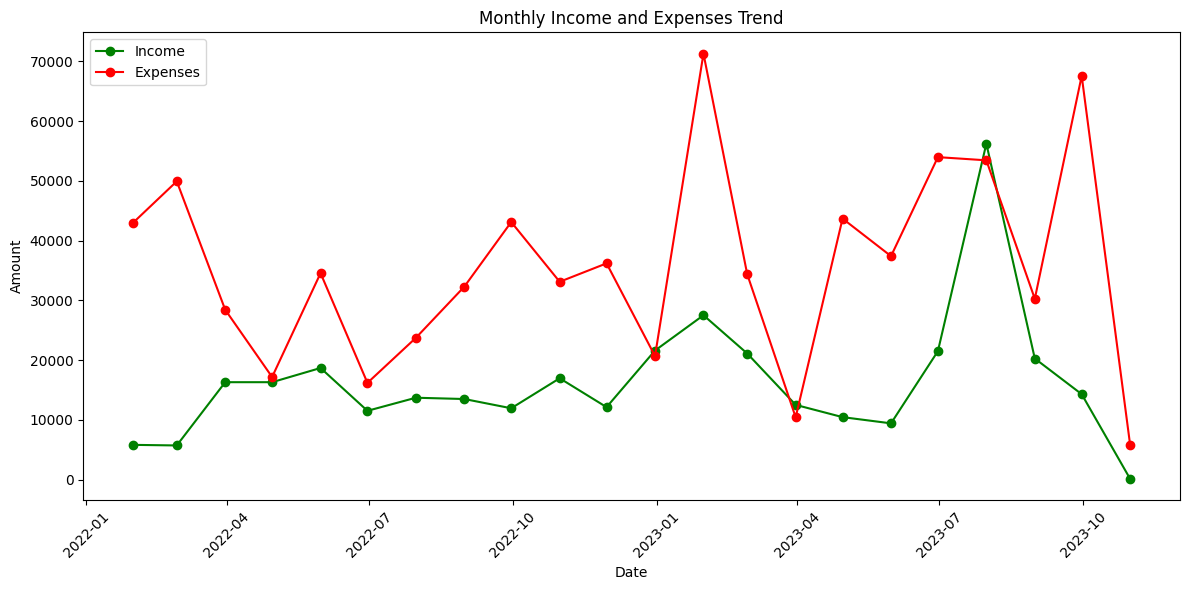

In [23]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_credits['date'], monthly_credits['amount'], label='Income', marker='o', color='green')
plt.plot(monthly_debits['date'], monthly_debits['amount'], label='Expenses', marker='o', color='red')
plt.title('Monthly Income and Expenses Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8. Key Insights and Recommendations

In [24]:
# Print summary of findings
print("\n--- Financial Analysis Summary ---")
print(f"Savings Rate: {savings_rate:.2f}%")
print("Top Recurring Transactions:")
print(recurring_transactions.head())
print("\nRecommendations:")
print("1. Monitor and optimize recurring expenses")
print("2. Build an emergency fund")
print("3. Investigate large or unusual transactions")


--- Financial Analysis Summary ---
Savings Rate: -120.06%
Top Recurring Transactions:
         name   amount  frequency
9    ABUTALAH   1000.0         27
205   Unknown  10000.0         20
7    ABUTALAH    500.0         13
204   Unknown   9000.0         12
13   ABUTALAH   2000.0          9

Recommendations:
1. Monitor and optimize recurring expenses
2. Build an emergency fund
3. Investigate large or unusual transactions


Description:
This multi-line chart displays the total transaction amounts and frequencies (number of transactions) over different months. It provides insights into how financial activity fluctuates over time.

In [25]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
import plotly.express as px

# Convert 'date' column to datetime format
bank_data['date'] = pd.to_datetime(bank_data['date'])

# Create a 'Period' column as string for Plotly compatibility
bank_data['Period'] = bank_data['date'].dt.to_period('M').astype(str)

# Group data by 'Period' to calculate transaction amount and counts
monthly_transactions = bank_data.groupby('Period').agg({'amount': 'sum', 'DrCr': 'count'}).reset_index()

# Plot the visualization
fig = px.line(
    monthly_transactions, 
    x='Period', 
    y=['amount', 'DrCr'], 
    title='Monthly Transaction Amount and Count', 
    labels={'value': 'Amount / Count', 'Period': 'Time Period'}
)
fig.show()

/var/folders/y3/qn3byhnn1s99k1n97gncyb4h0000gn/T/ipykernel_15181/2437626066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['date'] = pd.to_datetime(bank_data['date'])
/var/folders/y3/qn3byhnn1s99k1n97gncyb4h0000gn/T/ipykernel_15181/2437626066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data['Period'] = bank_data['date'].dt.to_period('M').astype(str)


 Identify recurring transactions (e.g., salary, bills) and their impact in terms of frequency and average amount.

In [27]:
# Group by 'name' (the party involved) and calculate the average amount and frequency
recurring = bank_data.groupby('name').agg({'amount': ['mean', 'count']}).reset_index()
recurring.columns = ['name', 'Avg Amount', 'Frequency']

# Filter for significant recurring transactions (e.g., Frequency > 5)
significant_recurring = recurring[recurring['Frequency'] > 5]  # Adjust threshold as needed

# Plot the visualization
fig = px.bar(
    significant_recurring, 
    x='name', 
    y='Frequency', 
    color='Avg Amount', 
    title='Recurring Transactions: Frequency and Average Amount',
    text='Avg Amount'
)
fig.show()


Compare inflows (credits) and outflows (debits) to evaluate the monthly financial balance.

In [28]:
# Create inflow and outflow columns safely
bank_data['Inflow'] = bank_data.loc[bank_data['DrCr'] == 'Cr', 'amount'].fillna(0)
bank_data['Outflow'] = bank_data.loc[bank_data['DrCr'] == 'Dr', 'amount'].fillna(0)

# Aggregate by 'Year' and 'Month'
monthly_summary = bank_data.groupby(bank_data['date'].dt.to_period('M')).agg({
    'Inflow': 'sum', 
    'Outflow': 'sum'
}).reset_index()

# Convert Period to string
monthly_summary['date'] = monthly_summary['date'].astype(str)

# Plot the visualization
fig = px.bar(
    monthly_summary,
    x='date',
    y=['Inflow', 'Outflow'],
    title='Monthly Income vs. Expenses',
    labels={'value': 'Amount', 'date': 'Month'}
)
fig.show()

/var/folders/y3/qn3byhnn1s99k1n97gncyb4h0000gn/T/ipykernel_15181/2394785015.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/y3/qn3byhnn1s99k1n97gncyb4h0000gn/T/ipykernel_15181/2394785015.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Analyze the relationship between transaction modes and involved names (parties).

In [29]:
# Create a pivot table for the heatmap
heatmap_data = bank_data.pivot_table(
    index='mode', 
    columns='name', 
    values='amount', 
    aggfunc='sum'
)

# Plot the visualization
fig = px.imshow(
    heatmap_data, 
    title='Transaction Mode vs. Name Heatmap',
    labels=dict(x="Name", y="Transaction Mode", color="Amount")
)
fig.show()

### Summary of Findings:

1. Data Structure: The dataset includes both debit and credit transactions with columns like date, transaction amount, and mode of payment. Missing values were handled, and duplicates were removed.

2. Outliers: Outliers in transaction amounts were detected and removed using the IQR method, resulting in a cleaner dataset for more accurate analysis.

3. Transaction Patterns: Recurring transactions were identified, with the most frequent debit transactions providing insights into regular expenses.

4. Financial Health:

Total Income and Expenses were calculated.

The savings rate was computed, offering a snapshot of financial health (proportion of income saved).


5. Visual Insights:

A pie chart of expense categories showed the distribution of spending across different modes.

A bar chart highlighted the comparison between total income and total expenses.

6.Monthly Trends: Monthly income and expense trends were plotted, revealing fluctuations and helping identify high-spending months.

### Key Recommendations:
1. Optimize Recurring Expenses: Regular debits should be monitored for potential reduction or optimization.
2. Build an Emergency Fund: Given the financial health analysis, it is advised to strengthen emergency savings.
Investigate Unusual Transactions: Larger or infrequent transactions warrant further investigation to avoid unnecessary spending.
